# NewSight Work Flow

1. 데이터 불러오기
2. 전처리, 명사추출 
3. 노이즈 제거 
4. (유의어, 불용어 처리)  -> 이후 2번 업데이트
5. TF-IDF 벡터화 
6. LDA 
7. LDA 주제별 문서 뽑기 
8. 문서검색(없어도될듯) 
9. 주제별 TF-IDF, Doc2Vec 벡터화 
10. 군집화, 시각화

데이터 불러오기 -> 전처리, 명사추출 -> 노이즈 제거 -> (유의어, 불용어 처리) -> TF-IDF 벡터화 -> LDA -> LDA 주제별 문서 뽑기 -> 문서검색(없어도될듯) -> 주제별 TF-IDF, Doc2Vec 벡터화 -> 군집화, 시각화

In [1]:
import newsight
newsight.readme()

******Description*****
code by 현호킴, description by 승현백
클래스 이름.help() : 해당 클래스에서 사용할 수 있는 함수 출력
******Class names******
1) 데이터 불러오기 : Pickle2DF
2) 전처리 : PreprocessingText
3) 불용어,유의어 처리 : GetSimilarWords, GetStopWords
4) 문서 검색 :  GetDocsFromQuery
5) 벡터화 :  Vectorizer
6) 시각화 : Get2DPlot, AnalyzingNewsData, WordCloud
7) 이상치 제거 : CleaningNoise
8) 키워드 추출 : GetKeyword
******수정사항*****
노가다화이팅


## 데이터 불러오기

In [2]:
mirae_list = ['data/미래에셋대우/rawdata_미래에셋대우.pickle']
blizzard_list = ['data/블리자드/rawdata_경향신문_블리자드.pickle',
                'data/블리자드/rawdata_국민일보_블리자드.pickle',
                'data/블리자드/rawdata_동아일보_블리자드.pickle',
                'data/블리자드/rawdata_디지털타임즈_블리자드.pickle',
                'data/블리자드/rawdata_매일경제_블리자드.pickle',
                'data/블리자드/rawdata_머니투데이_블리자드.pickle',
                'data/블리자드/rawdata_문화일보_블리자드.pickle',
                'data/블리자드/rawdata_서울신문_블리자드.pickle',
                'data/블리자드/rawdata_세계일보_블리자드.pickle',
                'data/블리자드/rawdata_아주경제_블리자드.pickle',
                'data/블리자드/rawdata_전자신문_블리자드.pickle',
                'data/블리자드/rawdata_조선일보_블리자드.pickle',
                'data/블리자드/rawdata_중앙일보_블리자드.pickle',
                'data/블리자드/rawdata_한겨레_블리자드.pickle',
                'data/블리자드/rawdata_한국경제_블리자드.pickle',
                'data/블리자드/rawdata_한국일보_블리자드.pickle',
                ]

data_list = mirae_list

In [3]:
data_loader = newsight.Pickle2DF()
df = data_loader.get_dataframe_from_list(data_list)

In [4]:
df.head()

,date,title,content,date_tmp
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,737168
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...",737168
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,737168
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,737168
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,737168


In [5]:
tmp_idx = []
for idx in range(df.shape[0]):
    if '미래에셋' in df.iloc[idx]['title'] : tmp_idx.append(idx)

# =========================

In [ ]:
# 데이터 크기 줄이기
import random
def reduction(data, number=100):
    rand_idx = random.sample(range(number),number)
    return df.iloc[rand_idx].copy()

# df_2 = reduction(df, 100) 
# or
# df_2 = df.copy()
#df_2 = df.iloc[tmp_idx].copy()
#len(df_2)

In [ ]:
tmp_idx = []
for idx in range(df_2.shape[0]):
    if 'ET투자뉴스' not in df_2.iloc[idx]['title'] : tmp_idx.append(idx)
        
df2_2 = df_2.iloc[tmp_idx].copy()

In [ ]:
len(df2_2)

In [ ]:
tmp_idx = []
for idx in range(df2_2.shape[0]):
    if '한경로보뉴스' not in df2_2.iloc[idx]['title'] : tmp_idx.append(idx)
        
df2_2 = df2_2.iloc[tmp_idx].copy()

In [ ]:
len(df2_2)

In [ ]:
df_2 = df2_2.copy()

# =======================

## 전처리, 명사추출

In [7]:
preprocessor = newsight.PreprocessingText()
preprocessor.help()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


******PreprocessingText******
1) make_content_re(df['컬럼이름'](Series)) : 입력받은 열을 전처리 후 시리즈로 반환
2) add_noun_dict('list') : 명사 사전에 단어 추가
3) add_stopwords('list') : 불용어 사전에 단어 추가
4) tokenize(df['컬럼이름'](Series)) : 입력받은 열을 토큰화한 후 시리즈로 반환
*****************************


### 명사 추가

In [8]:
# 명사 추가
filename = '미래에셋 단어사전.txt'
with open(filename) as file_object:
    contents = file_object.read()
noun_list = contents.split('\n')
preprocessor.add_noun_dict(noun_list)

추가한 명사
['최연소', '이테크', '그리고', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '고은빛', '쏠쏠', '한달', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '쉬어', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '따박따박', '저평가', '거래량', '내수', '건설사', '호실적', '코스메틱', '제이준', '아이센스', '분양권', '영입', '지주', '시황']


### 불용어 추가

In [71]:
stopwords_list = ['그리고','은', '는', '이', '가', '것','따박따박','그리고','미미','다소','설명'
                  ,'참고','작년','최저','통해','까지','최저','객관','만원','억원','다가','최근'
                  ,'미래에셋','미래에셋대우','위해','최근','대비','나타','현재','이번','평균','년도'
                  ,'오늘','수준','추이','년도','가능','최대','활용','초과','초반','감소','이번','제일'
                  ,'지난해','조억원','가의','역시','대신','전일','대신','업계','다시','지난','회사','대형'
                  ,'연속']
preprocessor.add_stopwords(stopwords_list)

추가한 불용어
['그리고', '은', '는', '이', '가', '것', '따박따박', '그리고', '미미', '다소', '설명', '참고', '작년', '최저', '통해', '까지', '최저', '객관', '만원', '억원', '다가', '최근', '미래에셋', '미래에셋대우', '위해', '최근', '대비', '나타', '현재', '이번', '평균', '년도', '오늘', '수준', '추이', '년도', '가능', '최대', '활용', '초과', '초반', '감소', '이번', '제일', '지난해', '조억원', '가의', '역시', '대신', '전일', '대신', '업계', '다시', '지난', '회사', '대형', '연속']


### 정규표현식 전처리 

In [72]:
df['make_content_re'] = preprocessor.make_content_re(df.content) 

### 명사 추출 

In [73]:
%%time
df['tokenized_doc'] = preprocessor.tokenize(df['make_content_re']) 

추가한 명사: ['최연소', '이테크', '그리고', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '고은빛', '쏠쏠', '한달', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '쉬어', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '따박따박', '저평가', '거래량', '내수', '건설사', '호실적', '코스메틱', '제이준', '아이센스', '분양권', '영입', '지주', '시황']
불용어:  ['은', '는', '이', '가', '것', '은', '는', '이', '가', '것', '따박따박', '그리고', '은', '는', '이', '가', '것', '따박따박', '그리고', '미미', '다소', '설명', '참고', '작년', '최저', '통해', '까지', '최저', '객관', '만원', '억원', '다가', '최근', '미래에셋', '미래에셋대우', '위해', '최근',

In [42]:
df.head()

,date,title,content,date_tmp,make_content_re,tokenized_doc
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,737168,지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,"[지난해, 말, 조직개편, 펀드, 판매, 승, 부수, 투자, 증권, 올해, 금융, ..."
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...",737168,코윈테크 코스닥 상장 추진 차전지 생산용 설비 제조 기업인 코윈테크가 코스닥시장 ...,"[코윈, 테크, 코스닥, 상장, 추진, 차, 전지, 생산, 용, 설비, 제조, 기업..."
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,737168,올해 들어 증시가 호조를 보이면서 증권주들이 기 양호한 성적표를 받아들었다 이에 증...,"[올해, 증시, 호조, 보이, 면서, 증권주, 기, 양호, 성적표, 아들, 었다, ..."
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,737168,한화 라이프플러스 상장지수펀드 ETF 의 수익률이 설정 이후 양호한 수익률을 올리고...,"[한화, 라이프, 플러스, 상, 장지수, 펀드, 의, 수익률, 설정, 이후, 양호,..."
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,737168,미래에셋벤처투자는 지난 억원으로 결성했던 사회적기업호펀드가 의 수익을 올린 뒤...,"[벤처, 투자, 지난, 결성, 사회적기업, 호, 펀드, 의, 수익, 뒤, 지난달, ..."


필요한 함수(성윤)
1. 유의어 사전
2. 유의어 대체 함수

## 노이즈 제거

In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def count_topic(tokenized_doc, topic):
    counting = []
    for news in tokenized_doc:
        counting.append(news.count(topic))
    return counting

def plot_hist(counting):
    counting_pd = pd.Series(counting)
    bins = len(counting_pd.value_counts())
    counting_pd.hist(figsize=(16, 12), bins=bins+20)
    plt.xlabel("counting", fontsize=14)
    plt.show()

def get_proper_news(data, counting, threshold):
    select = np.array(counting) >= threshold
    print('number of total data:', len(data))
    print('number of proper data:', sum(select))
    return data[select].copy()

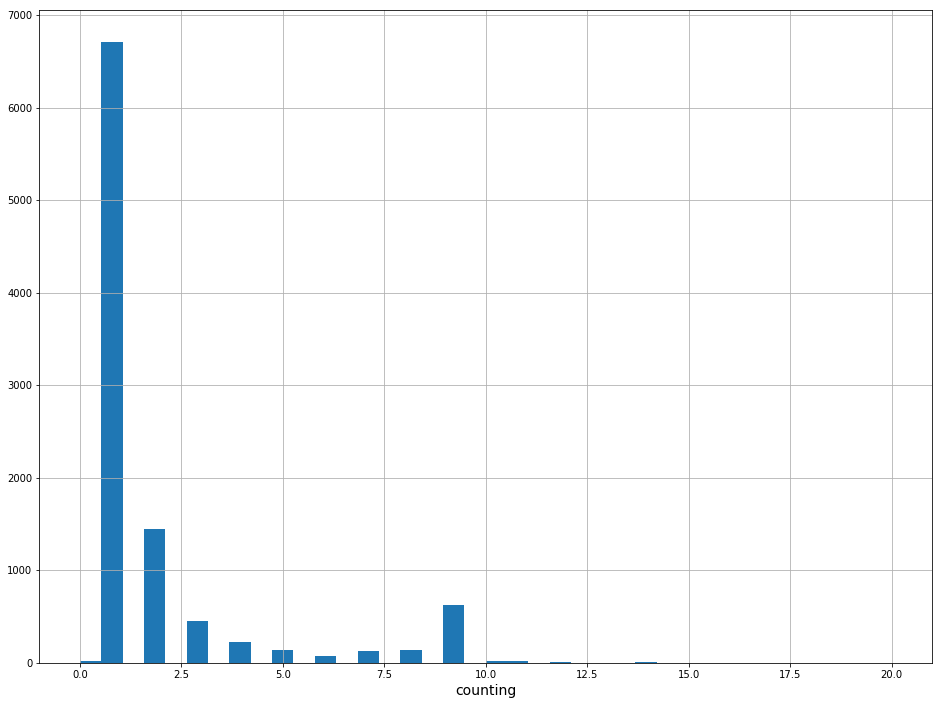

In [21]:
counting = count_topic(df.tokenized_doc, "미래에셋대우")
plot_hist(counting)

In [63]:
data = get_proper_news(df, counting, threshold=3)

number of total data: 10000
number of proper data: 1829


필요한 함수
1. 노이즈 제거 방법을 제목에 주제어 미포함으로 했을 때 노이즈 제거 함수 

## 유의어, 불용어 처리

In [64]:
special_words = newsight.GetSpecialWords()
special_words.help()

******GetSimilarWords******
1) get_w2v_model(토큰화된 문서(Series),doc2vec 차원 크기(int)) : doc2vec 모델 학습
2) get_similar_words(단어(str)) : 유의어 출력
3) get_bow(토큰화된 문서(Series)) : bow 생성
4) get_stop_words(단어 출현 빈도 순위(int)) : 단어 출현 빈도 상위 n 개, 하위 n 개 출력
*****************************


### word2vec으로 유의어 찾기

In [25]:
%%time
special_words.get_w2v_model(data.tokenized_doc,size = 300)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


KeyboardInterrupt: 

In [26]:
special_words.get_similar_words('투자')

단어 : 유사도


AttributeError: 'GetSpecialWords' object has no attribute 'model'

### bow로 불용어 찾기

In [ ]:
#stop_words = newsight.GetStopWords()
#stop_words.help()

In [27]:
special_words.get_bow(data.tokenized_doc)
special_words.get_stop_words(10) # 출현 빈도 상위,하위 10위 단어 출력

의견
목표
투자
미래에셋대우
매수
주가
제시
유지
증권
최근
일봉
쿼드
액티비전
목도
상원
과분
불미
파라
근간
글리


# 카테고리화!!

## TF-IDF 벡터화 

In [65]:
vectorizer = newsight.Vectorizer()
vectorizer.help()

******GetDocsFromQuery******
1)get_tfidf_vec(토큰화된 문서(Series),단어 수(int)) : 문서를 tfidf 벡터(x) 와 단어(words)로 반환
2)get_doc2vec(토큰화된 문서(Series)) : doc2vec 벡터 반환
3)load_doc2vec_model(토큰화된 문서(Series),모델객체(word2vec_obj)): 저장된 모델로  doc2vec 벡터 반환
*****************************


In [66]:
x_tfidf, words = vectorizer.get_tfidf_vec(data.tokenized_doc, max_feat=5000,
                                         min_df=0.1, max_df=0.9) # tf idf

## LDA

In [74]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                               max_iter=25, random_state=0)
document_topics = lda.fit_transform(x_tfidf)

Wall time: 5.22 s


In [75]:
def get_topics(components, feature_names, n=10):
    issues = []
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), 
              [(feature_names[i], topic[i].round(2), i) for i in topic.argsort()[:-n - 1:-1]])
        tmp = []
        tmp.extend(feature_names[i] for i in topic.argsort()[:-n - 1:-1])
        issues.append(tmp)
    return issues

In [76]:
issues = get_topics(lda.components_, words)

Topic 1: [('가의', 0.1, 4), ('추세', 0.1, 185), ('보수', 0.1, 81), ('해석', 0.1, 209), ('종가', 0.1, 160), ('차이', 0.1, 179), ('역시', 0.1, 124), ('대신', 0.1, 46), ('전일', 0.1, 147), ('통계', 0.1, 190)]
Topic 2: [('고객', 48.79, 17), ('서비스', 42.8, 102), ('주식', 38.93, 164), ('자산', 36.02, 143), ('관리', 28.9, 23), ('상품', 24.36, 99), ('해외', 22.8, 210), ('투자자', 20.24, 192), ('글로벌', 17.47, 29), ('센터', 16.78, 105)]
Topic 3: [('글로벌', 60.09, 29), ('금융', 44.09, 30), ('투자', 42.36, 191), ('해외', 42.1, 210), ('법인', 37.69, 79), ('그룹', 37.36, 28), ('인수', 28.52, 141), ('사업', 28.09, 95), ('대표', 24.66, 47), ('참여', 24.28, 180)]
Topic 4: [('가의', 0.1, 4), ('추세', 0.1, 185), ('보수', 0.1, 81), ('해석', 0.1, 209), ('종가', 0.1, 160), ('차이', 0.1, 179), ('역시', 0.1, 124), ('대신', 0.1, 46), ('전일', 0.1, 147), ('통계', 0.1, 190)]
Topic 5: [('주가', 26.52, 163), ('기관', 23.53, 34), ('하락', 21.34, 201), ('상품', 19.61, 99), ('수익률', 18.7, 110), ('수익', 18.19, 109), ('비중', 17.75, 94), ('거래', 17.35, 12), ('손실', 14.81, 106), ('기준', 14.71, 41)]
Topic 6: [('증

In [77]:
issues

[['가의', '추세', '보수', '해석', '종가', '차이', '역시', '대신', '전일', '통계'],
 ['고객', '서비스', '주식', '자산', '관리', '상품', '해외', '투자자', '글로벌', '센터'],
 ['글로벌', '금융', '투자', '해외', '법인', '그룹', '인수', '사업', '대표', '참여'],
 ['가의', '추세', '보수', '해석', '종가', '차이', '역시', '대신', '전일', '통계'],
 ['주가', '기관', '하락', '상품', '수익률', '수익', '비중', '거래', '손실', '기준'],
 ['증권', '투자', '삼성', '증권사', '실적', '수익', '업계', '한국투자증권', '영업', '증가'],
 ['의견', '목표', '매수', '제시', '주가', '유지', '투자', '컨센서스', '발표', '증권'],
 ['애널', '리스트', '대형', '리포트', '연속', '센터', '분석', '다시', '전망', '계속'],
 ['가의', '추세', '보수', '해석', '종가', '차이', '역시', '대신', '전일', '통계'],
 ['주주', '회사', '대표', '주식', '한국', '지난', '가치', '예정', '규모', '계획']]

## LDA 주제별 문서 뽑기

In [ ]:
data_from_issues  = newsight.GetKeyword()

In [ ]:
issues_based_data = data_from_issues.get_issues_based_dataframe(data, issues, length=70)

In [ ]:
for i in range(len(issues_based_data)):
    display(issues_based_data[i].head())

# ===============================

## 문서검색(없어도 될듯)

In [ ]:
doc_selector = newsight.GetDocsFromQuery()
doc_selector.help()

In [ ]:
doc_selector.set_query('미래에셋대우')

In [ ]:
query_docs = doc_selector.select_news(data['tokenized_doc'])

In [ ]:
query_docs.tail()

## 주제별 TF-IDF, Doc2Vec 벡터화

In [ ]:
vectorizer = newsight.Vectorizer()
vectorizer.help()

### TFIDF

In [ ]:
x_tfidf_list = []
words_list = []
for i in range(len(issues_based_data)):
    x_tfidf, words = vectorizer.get_tfidf_vec(issues_based_data[i].tokenized_doc,max_feat=5000,
                                             min_df=0.1, max_df=0.9) # tf idf
    x_tfidf_list.append(x_tfidf)
    words_list.append(words_list)

### Dov2Vec

In [ ]:
%%time
x_doc2vec_list = []
for i in range(len(issues_based_data)):
    print("Issue %s" %i)
    x_doc2vec = vectorizer.get_doc2vec(issues_based_data[i].tokenized_doc, 
                                       model_name="d2v%s.model" %i)
    x_doc2vec_list.append(x_doc2vec)
    print("=" * 10)

## 군집화, 시각화, 분석

### TF-IDF

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

class Get2DPlot:

    def help(self):
        print('아 난해하다 알아서 쓰세요')

    def __init__(self, x, vec_kind='tfidf',reduction_method="PCA",
                 learning_rate=200, init='pca', random_state=10,
                 cluster_method="DBSCAN", eps=7, min_sample=2, n_clusters=3):
        self.reduction_method = reduction_method
        self.learning_rate = learning_rate
        self.init = init
        self.random_state = random_state
        self.cluster_method = cluster_method
        self.eps = eps
        self.min_sample = min_sample
        self.n_clusters = n_clusters
        if vec_kind == 'tfidf':
            self.x_scaled = x
        elif vec_kind == 'doc2vec':
            self.x_scaled = StandardScaler().fit_transform(x)
        else:
            print("vec_kind must me 'tfidf' or 'doc2vec'")
            raise NotImplementedError

    def get_2D_vec(self):
        if self.reduction_method == 'TSNE':
            t_sne = TSNE(n_components=2, learning_rate=self.learning_rate, init=self.init,
                         random_state=self.random_state)
            self.vec = t_sne.fit_transform(self.x_scaled)
        elif self.reduction_method == 'PCA':
            pca = PCA(n_components=2)
            self.vec = pca.fit_transform(self.x_scaled)
        return self.vec

    def get_cluster_labels(self):
        if self.cluster_method == 'kmeans':
            cluster = KMeans(n_clusters=self.n_clusters, random_state=self.random_state).fit(self.x_scaled)
            self.cluster_labels = cluster.labels_
        elif self.cluster_method == 'DBSCAN':
            self.cluster_labels = DBSCAN(eps=self.eps, min_samples=self.min_sample, metric='cosine').fit_predict(self.x_scaled)
        vec_pd = np.c_[self.vec, self.cluster_labels]
        self.vec_pd = pd.DataFrame(vec_pd, columns=['x', 'y', 'labels'])
        print(self.cluster_labels)

    def plot2D(self):
        print(self.reduction_method, self.cluster_method)
        groups = self.vec_pd.groupby('labels')
        fig, ax = plt.subplots()
        for name, group in groups:
            ax.plot(group.x,
                    group.y,
                    marker='o',
                    linestyle='',
                    label=name)
        # ax.legend(fontsize=12, loc='upper left') # legend position

        plt.title('%s Plot of %s' % (self.reduction_method, self.cluster_method), fontsize=20)
        plt.xlabel('x', fontsize=14)
        plt.ylabel('y', fontsize=14)
        plt.show() 

In [ ]:
issues

In [ ]:
issue_number = 2
x_tfidf = x_tfidf_list[issue_number]
x_doc2vec = x_doc2vec_list[issue_number]
issue_data = issues_based_data[issue_number]
print(issues[issue_number])

#### 군집화, 시각화

In [ ]:
cluster_tfidf = Get2DPlot(x_tfidf, 'tfidf', eps=0.3, min_sample=4)
cluster_tfidf.help()

In [ ]:
%%time
tfidf_2d = cluster_tfidf.get_2D_vec()
cluster_tfidf.get_cluster_labels()
cluster_tfidf.plot2D()

In [ ]:
# 라벨 생성
clusters = sorted(list(set(cluster_tfidf.cluster_labels)))
issue_data['labels'] = cluster_tfidf.cluster_labels

#### 분석

In [ ]:
analyzer = newsight.AnalyzingNewsData()
analyzer.help()

In [ ]:
display(analyzer.get_n_data_per_cluster(cluster_tfidf.cluster_labels)[0:10])

In [ ]:
analyzer.print_news_per_cluster(issue_data, analyzer.get_n_data_per_cluster(cluster_tfidf.cluster_labels)[1:10].index, 'title')

### Doc2Vec

In [ ]:
cluster_doc2vec = Get2DPlot(x_doc2vec, 'doc2vec', eps=0.47, min_sample=4)
cluster_doc2vec.help()

In [ ]:
doc2vec_2d = cluster_doc2vec.get_2D_vec()
cluster_doc2vec.get_cluster_labels()
cluster_doc2vec.plot2D()

In [ ]:
# 라벨 생성
clusters = sorted(list(set(cluster_doc2vec.cluster_labels)))
issue_data['labels'] = cluster_doc2vec.cluster_labels

#### 분석

In [ ]:
analyzer = newsight.AnalyzingNewsData()
analyzer.help()

In [ ]:
display(analyzer.get_n_data_per_cluster(cluster_doc2vec.cluster_labels)[0:10])

In [ ]:
analyzer.print_news_per_cluster(issue_data, analyzer.get_n_data_per_cluster(cluster_doc2vec.cluster_labels)[1:10].index, 'title')

In [ ]:
import pickle
import datetime

In [ ]:
def get_dataframe(data_name_with_route):
        with open(data_name_with_route, 'rb') as file:
            data_list = []
            while True:
                try:
                    data = pickle.load(file)
                except EOFError:
                    break
                data_list.append(data)
        # construct lists for data frame
        title = []
        content = []
        date = []
        category = []
        for news in data_list[0]['return_object']['documents']:
            title.append(news['title'])
            content.append(news['content'])
            date.append(news['published_at'][:10])  # 시간 조정이 필요하면 바꾸기
            category.append(news['category'])
        # make lists as data frame
        news_data = pd.DataFrame([])
        news_data['date'] = date
        news_data['title'] = title
        news_data['content'] = content
        news_data['category'] = category
        news_data['date_tmp'] = news_data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').toordinal())
        return news_data

In [ ]:
df = get_dataframe('data/미래에셋대우/rawdata_미래에셋대우.pickle')

In [ ]:
tmp_idx = []
for idx in range(df.shape[0]):
    if '미래에셋' in df.iloc[idx]['title'] : tmp_idx.append(idx)

In [ ]:
df[df['category'].apply(lambda x :  True if len(x) == 0 else False)].title

In [ ]:
df.category

In [ ]:
df_category = []
for category in df.iloc[tmp_idx].category:
    if len(category) != 0:
        df_category.append(category)

In [ ]:
df.category[0][0]

In [ ]:
df_category

In [ ]:
pd.Series(df_category).apply(lambda x : ' '.join(x)).value_counts()